In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Load nodes and edges
G = nx.Graph()
G.add_nodes_from(list(range(1,12)))

edges = [
    (1, 2, {"weight": 2}),
    (1, 10, {"weight": 3}),
    (2, 4, {"weight": 7}),
    (2, 10, {"weight": 4}),
    (3, 5, {"weight": 4}),
    (3, 8, {"weight": 3}),    
    (3, 9, {"weight": 5}),
    (4, 8, {"weight": 5}),
    (4, 10, {"weight": 6}),
    (4, 12, {"weight": 3}),
    (5, 9, {"weight": 5}),
    (6, 7, {"weight": 5}),
    (6, 10, {"weight": 3}),
    (6, 11, {"weight": 4}),
    (7, 9, {"weight": 6}),
    (7, 11, {"weight": 2}),
    (8, 9, {"weight": 3}),
    (8, 12, {"weight": 1}),
    (9, 11, {"weight": 3}),
    (10, 12, {"weight": 1}),
    (11, 12, {"weight": 4}),
]

G.add_edges_from(edges)


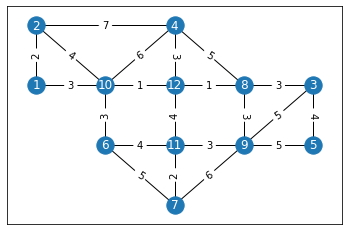

In [2]:
pos = {
    1: (0, 2),
    2: (0, 3),
    3: (4, 2),
    4: (2, 3),
    5: (4, 1),
    6: (1, 1),
    7: (2, 0),
    8: (3, 2),
    9: (3, 1),
    10: (1, 2),
    11: (2, 1),
    12: (2, 2),
}

#node_colors = ["r" if n == "S" or n == "G" else "k" for n in list(G.nodes)]
#highlight_edges = list((zip(result[:-1], result[1:])))
#highlight_edges = [tuple(sorted(e)) for e in highlight_edges]
#edge_colors = ["r" if e in highlight_edges else "k" for e in list(G.edges)]
#edge_widths = [4 if e in highlight_edges else 1 for e in list(G.edges)]
labels = nx.get_edge_attributes(G, "weight")

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx(
    G,
    pos=pos,
    font_color="w"
    )
""" node_color=node_colors,
    ,
    edge_color=edge_colors,
    width=edge_widths,
)"""
plt.show()

In [3]:
shortcuts = {}
shortest_paths = dict(nx.all_pairs_dijkstra_path_length(G, weight="weight"))
current_G = G.copy()
for node in G.nodes:
    current_G.remove_node(node)
    current_shortest_paths = dict(
        nx.all_pairs_dijkstra_path_length(current_G, weight="weight")
    )
    for u in current_shortest_paths:
        if u == node:
            continue
        SP_contracted = current_shortest_paths[u]
        SP_original = shortest_paths[u]
        for v in SP_contracted:
            if u == v or node == v:
                continue
            if (
                SP_contracted[v] != SP_original[v]
                and G.has_edge(node, u)
                and G.has_edge(node, v)
            ):
                G.add_edge(u, v, weight=SP_original[v], contracted=True)
                shortcuts[(u,v)] = node


In [4]:
cost, route = nx.bidirectional_dijkstra(G, 1,5, weight="weight")
uncontracted_route = [route[0]]
for u,v in zip(route[:-1],route[1:]):
    if (u,v) in shortcuts:
        uncontracted_route.append(shortcuts[(u,v)])
    uncontracted_route.append(v)
print(uncontracted_route)



[1, 10, 12, 8, 3, 5]


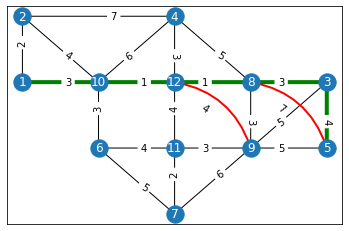

In [5]:
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.4, )
contracted_edges = nx.get_edge_attributes(G,"contracted")
ec = ["r" if edge in contracted_edges else "b" for edge in G.edges]
highlight_edges = list((zip(uncontracted_route[:-1], uncontracted_route[1:])))
highlight_edges = [tuple(t) for t in [sorted(e) for e in highlight_edges]]
edge_colors = ["r" if e in highlight_edges else "k" for e in list(G.edges)]
edge_widths = [4 if e in highlight_edges else 1 for e in list(G.edges)]

ax = plt.gca()
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G,pos, font_color='w')

# Draw each edges one at a time, modifying curvature by index
for e in G.edges:
    c = "red" if e in contracted_edges else "black"
    c = "green" if e in highlight_edges else c
    w = 2 if e in contracted_edges else 1
    w = 4 if e in highlight_edges else w
    curve = 1 if e in contracted_edges else 0
    zorder = 1 if e in contracted_edges else 0
    ax.annotate("",xy=pos[e[0]], xycoords='data', xytext=pos[e[1]], textcoords='data', color=c, arrowprops=dict(arrowstyle="-", connectionstyle=f"arc3, rad={-0.3*curve}", lw=w, color=c),zorder=zorder)

plt.show()